# Import

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import random

# Load Data

In [28]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [33]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
                        
X_train = X_train/255.0
Y_train = Y_train/255.0

In [34]:
print("Shape of X trian:", X_train.shape)
print("Shape of y trian:", Y_train.shape)
print("Shape of X test:", X_test.shape)
print("Shape of Y test:", Y_test.shape)

Shape of X trian: (2000, 100, 100, 3)
Shape of y trian: (2000, 1)
Shape of X test: (400, 100, 100, 3)
Shape of Y test: (400, 1)


In [35]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

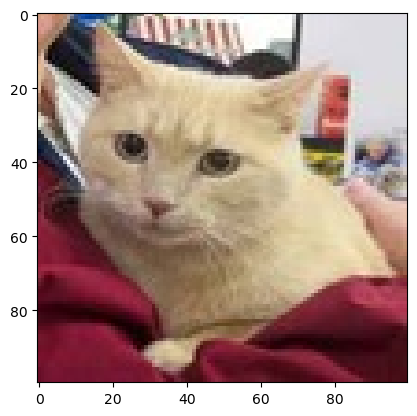

In [23]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])

# Model 

In [36]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)), 
    MaxPooling2D((2,2)),
                    
    Conv2D(32, (3, 3), activation = 'relu'), 
    MaxPooling2D((2, 2)),
                    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [40]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [48]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4861 - loss: 0.0142
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.4997 - loss: 0.0138
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.4873 - loss: 0.0141
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4910 - loss: 0.0139
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.5009 - loss: 0.0137


In [49]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7916 - loss: 157.7816


[377.3469543457031, 0.5]




# Making predictions

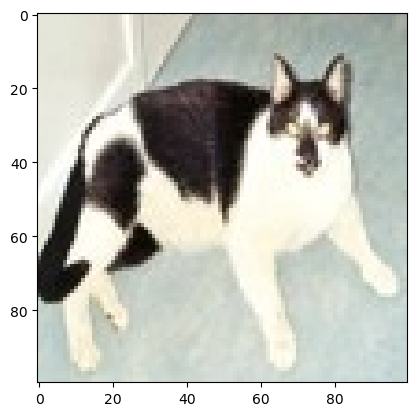

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: cat


In [79]:
import matplotlib.pyplot as plt
import random

idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2] / 255.0)  # Normalize pixel values to the range [0, 1]
plt.show()

normalized_image = X_test[idx2] / 255.0  # Normalize pixel values to the range [0, 1]
normalized_image_reshaped = normalized_image.reshape(1, 100, 100, 3)

y_pred = model.predict(normalized_image_reshaped)

predicted_class_index = y_pred.argmax()
predicted_class = "cat" if predicted_class_index == 0 else "dog"

print("Predicted class:", predicted_class)
